In [1]:
import cartopy.crs as ccrs
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_adj
from pathlib import Path
import xarray as xr
from os.path import join,expanduser
# identify user's home directory
user_home_dir = expanduser('~')
# import the ECCOv4 py library
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
import cmocean as cmo
from matplotlib import colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np
from pathlib import Path
from pprint import pprint
import requests
import s3fs
import zarr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cmocean as cmo
from matplotlib.colors import BoundaryNorm
import matplotlib.ticker as mticker
import cmocean as cmo
from matplotlib.patches import Rectangle
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
import pandas as pd




In [2]:
## load the r5 up to 2017:
## Open the ECCO grid files
grid_dir  = Path('/home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/geometry/')
ds_grid   = xr.open_dataset(grid_dir / 'GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc')

## Open the monthly velocity files 
directory = Path('/home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_VELOCITY')
ecco_v4r5_mon_mean_native_dataset_paths = np.sort(list(directory.glob('*')))
feb17_file = next(directory.glob('*2017-02*.nc'))
print("February 2017 file is:", feb17_file)
# Then load just that one:
ds_feb17 = xr.open_dataset(feb17_file)
uvel1    = ds_feb17.UVEL
vvel1    = ds_feb17.VVEL
wvel1    = ds_feb17.WVEL
##
uvel1fin, vvel1fin = ecco.vector_calc.UEVNfromUXVY(uvel1, vvel1, ds_grid)

February 2017 file is: /home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_VELOCITY/OCEAN_VELOCITY_mon_mean_2017-02_ECCO_V4r5_native_llc0090.nc


In [43]:
# grid dir for V4r4
grid_dir = '/efs_ecco/ECCO/EMU/emu_input_dir/emu_ref/'
wz = ds_grid.drF * ds_grid.hFacC
dir_ref = '/efs_ecco/ECCO/EMU/emu_input_dir/emu_ref/diags/'

vars_to_load = ['THETA', 'SALT', 'UVEL', 'VVEL']

simref = ecco.load_ecco_vars_from_mds(dir_ref, grid_dir,
                                      #drop_unused_coords=True,
                                      mds_files = 'state_3d_set1_mon',
                                      vars_to_load = vars_to_load,
                                      output_freq_code='AVG_MON',
                                      less_output=True)

In [45]:
dir_new = '/efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_msim_PERTURBATION_20250528_040605/diags/'

simnew = ecco.load_ecco_vars_from_mds(dir_new, grid_dir,
                                      #drop_unused_coords=True,
                                      mds_files = 'state_3d_set1_mon',
                                      vars_to_load = vars_to_load,
                                      output_freq_code='AVG_MON',
                                      less_output=True)


In [78]:
simref_all = simref.sel(time=slice('2017-01-01', '2018-01-01'))
simnew_all = simnew.sel(time=slice('2017-01-01', '2018-01-01'))  

In [95]:
temp = ((simpert_17.THETA*wz)[10,0:5,:,:,:]).sum(dim=["k"],skipna=True)

Text(0.5, 0.98, '2017-11-16')

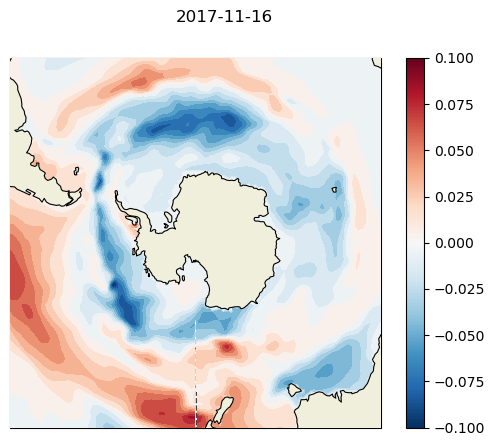

In [101]:
colorm = "RdBu_r"
fig=ecco.plot_proj_to_latlon_grid(ds_grid.XC, ds_grid.YC, temp, 
                                     projection_type='stereo',plot_type = 'contourf', 
                                     show_colorbar=True,dx=1, dy=1,lat_lim=-40,
                                     cmin = -0.1, cmax = 0.1,
                                     colormap=colorm,show_coastline=True);
fig[0].suptitle(temp.time.values.astype('str')[0:10])


In [82]:
## do a movie of temperature throughout all the years of the perturbaion
simref_all = simref.sel(time=slice('2009-01-01', '2018-01-01'))
simnew_all = simnew.sel(time=slice('2009-01-01', '2018-01-01'))  
simpert_all = simnew_all - simref_all

In [94]:
simpert_all

<xarray.Dataset> Size: 9GB
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 107, nv: 2)
Coordinates: (12/45)
  * i          (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    maskCtrlW  (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlC  (k, tile, j, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlS  (k, tile, j_g, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 856B 149772 150444 151188 ... 225708 226452 227172
    time_bnds  (time, nv) datetime64[ns] 2kB 2009-01-01 ... 2017-12-01
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 2GB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 2GB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    UVEL       (time, k, tile, j, i_g) float32 2GB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    VVEL       (time, k, tile, j_g, i) float32 2GB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>

In [98]:
colorm = "RdBu_r"
for ts in range(12,107):
  temp = ((simpert_all.THETA*wz)[ts,0:5,:,:,:]).sum(dim=["k"],skipna=True)
  fig=ecco.plot_proj_to_latlon_grid(ds_grid.XC, ds_grid.YC, temp, 
                                    projection_type='stereo',plot_type = 'contourf', 
                                     show_colorbar=True,dx=1, dy=1,lat_lim=-40,
                                     cmin = -0.1, cmax = 0.1,
                                     colormap=colorm,show_coastline=True);
  fig[0].suptitle(temp.time.values.astype('str')[0:10]) 
  plt.savefig(f'/efs_ecco/sdarma/FIGURES/PERTURBATION/T_PERTURB_{ts}.png')     
  plt.close()



In [ ]:
####NOW I RUN THE FOLLOWING CODE IN TERMINAL OF PERTURBATIONS NOT IN NOTEBOOK ######
###1t to rename the files to be able to gif them afterwards ##
#var=T_PERTURB
##for f in ${var}_*.png; do
  # Strip prefix and suffix cleanly
#  num_part=${f#${var}_}        # removes 'T_PERTURB_'
#  num_part=${num_part%.png}    # removes '.png'

  # Strip leading zeros safely and convert to number
  #num=$((10#$num_part))

  # Format with leading zeros
#  new=$(printf "${var}_%03d.png" "$num")

  # Rename
#  mv -v -- "$f" "$new"#
#done

In [74]:
temp.time.values.astype('str')[0:10]


'2017-11-16'

In [ ]:
ecco.plot_tiles(simpert_17.UVEL.isel(time=0,k=0),
                show_colorbar=True, rotate_to_latlon=True,
                layout='latlon', show_tile_labels=False)

(<Figure size 900x789 with 17 Axes>,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

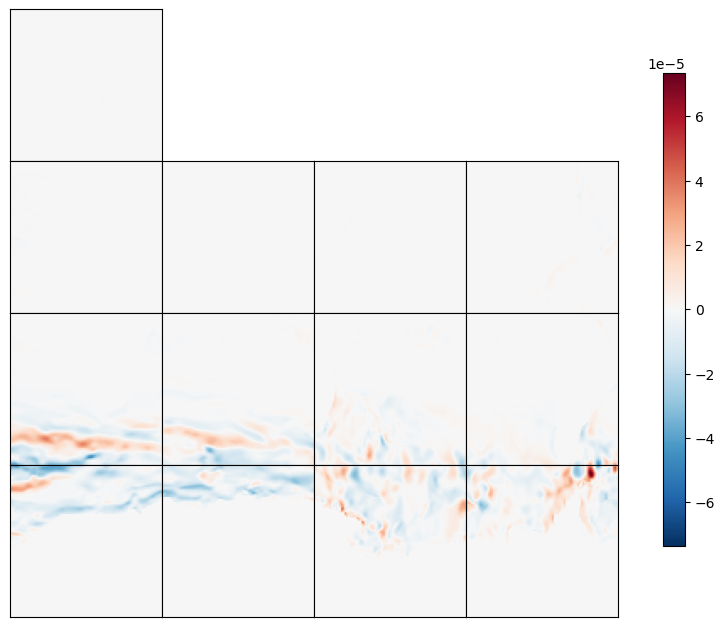

In [38]:
ecco.plot_tiles(simpert_17.UVEL.isel(time=0,k=10),
                show_colorbar=True, rotate_to_latlon=True,
                layout='latlon', show_tile_labels=False)

In [103]:
simpert_17['XG'] = ds_grid['XG']
simpert_17['YG'] = ds_grid['YG']

In [111]:
# evelpert,nvelpert = \
# ecco.vector_calc.UEVNfromUXVY(simpert_17.UVEL.isel(time=0), 
#                               simpert_17.VVEL.isel(time=0), ds_grid)
uvel1fin, vvel1fin = ecco.vector_calc.UEVNfromUXVY(uvel1, vvel1, ds_grid)

In [112]:
simpert_17.UVEL.isel(time=0)

<xarray.DataArray 'UVEL' (k: 50, tile: 13, j: 90, i_g: 90)> Size: 21MB
dask.array<getitem, shape=(50, 13, 90, 90), dtype=float32, chunksize=(1, 1, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
    time       datetime64[ns] 8B 2017-01-16T12:00:00
    Z          (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    ...         ...
    PHrefC     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    hFacW      (k, tile, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW      (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   int64 8B 219900

In [108]:
uvel1

<xarray.DataArray 'UVEL' (time: 1, k: 50, tile: 13, j: 90, i_g: 90)> Size: 21MB
array([[[[[      nan, ...,       nan],
          ...,
          [ 0.082321, ...,  0.052227]],

         ...,

         [[-0.05124 , ...,       nan],
          ...,
          [-0.0741  , ...,       nan]]],


        ...,


        [[[      nan, ...,       nan],
          ...,
          [      nan, ...,       nan]],

         ...,

         [[      nan, ...,       nan],
          ...,
          [      nan, ...,       nan]]]]], dtype=float32)
Coordinates:
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 8B 2017-02-15
    Z        (k) float32 200B ...
Attributes:
    valid_min:              -0.88528407
    valid_max:              0.7442509
    coverage_content_type:  modelResult
    direction:              >0 increases volume
    long_name:              Horizontal velocity in the model +x direction
    standard_name:          sea_water_x_velocity
    units:                  m s-1
    comment:                Horizontal velocity in the +x direction at the 'u...

In [107]:
simpert_17.UVEL

<xarray.DataArray 'UVEL' (time: 11, k: 50, tile: 13, j: 90, i_g: 90)> Size: 232MB
dask.array<sub, shape=(11, 50, 13, 90, 90), dtype=float32, chunksize=(1, 1, 1, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 88B 2017-01-16T12:00:00 ... 2017-11-16
    Z          (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    ...         ...
    PHrefC     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    hFacW      (k, tile, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW      (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 88B 219900 220572 221316 ... 225708 226452 227172

In [100]:
simpert_17.UVEL

<xarray.DataArray 'UVEL' (time: 11, k: 50, tile: 13, j: 90, i_g: 90)> Size: 232MB
dask.array<sub, shape=(11, 50, 13, 90, 90), dtype=float32, chunksize=(1, 1, 1, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * i_g        (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 88B 2017-01-16T12:00:00 ... 2017-11-16
    Z          (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    ...         ...
    PHrefC     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    hFacW      (k, tile, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW      (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 88B 219900 220572 221316 ... 225708 226452 227172

In [41]:
simpert_17.UVEL

<xarray.DataArray 'UVEL' (time: 11, k: 50, tile: 13, j: 90, i_g: 90)> Size: 232MB
dask.array<sub, shape=(11, 50, 13, 90, 90), dtype=float32, chunksize=(1, 1, 1, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * i_g        (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 88B 2017-01-16T12:00:00 ... 2017-11-16
    Z          (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    ...         ...
    PHrefC     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    hFacW      (k, tile, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW      (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, tile, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 88B 219900 220572 221316 ... 225708 226452 227172

In [30]:
simref_17.time

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2017-01-16T12:00:00.000000000', '2017-02-15T00:00:00.000000000',
       '2017-03-16T12:00:00.000000000', '2017-04-16T00:00:00.000000000',
       '2017-05-16T12:00:00.000000000', '2017-06-16T00:00:00.000000000',
       '2017-07-16T12:00:00.000000000', '2017-08-16T12:00:00.000000000',
       '2017-09-16T00:00:00.000000000', '2017-10-16T12:00:00.000000000',
       '2017-11-16T00:00:00.000000000', '2017-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    timestep  (time) int64 96B dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) datetime64[ns] 96B 2017-01-16T12:00:00 ... 2017-12-16
Attributes:
    long_name:  center time of averaging period

In [3]:
## now read the simulation data
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import lib_python
globals_dict = ept.emu_plot(run_name="/efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_msim_PERTURBATION_20250528_040605",
                            frequency='m',
                            pfile_beg=0, pfile_end=1000000,
                            pvar=1);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_msim_PERTURBATION_20250528_040605

Reading /efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_msim_PERTURBATION_20250528_040605

Reading Modified Simulation Tool output ... 

Checking EMU standard model state output ... 


Detected 
  3280 files of state_2d_set1_day.*.data
   108 files of state_2d_set1_mon.*.data
   108 files of state_3d_set1_mon.*.data
Specified start and end files #: 0 and 1000000

Choose variable to plot ... 
1) SSH
2) OBP
3) THETA
4) SALT
5) U
6) V

Specified frequency 'm' for monthly or 'd' for daily: m

==> Reading and plotting monthly means ... 
Specified variable # to extract: 1

-------------------
Plotting ... SSH

==> Reading and extracting 2d monthly means ... 
Extrating ... SSH
*********************************************
Returning variable 
   fld2d: last p

In [37]:
fld_all = return_vars['variable']

In [35]:
fld_all[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.10009688,
         0.11383691,  0.12773626],
       [ 0.13948783,  0.150502  ,  0.16226886, ..., -1.2759764 ,
        -1.3059187 , -1.3418823 ],
       [-1.3775599 , -1.4108597 , -1.4435599 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)